**Topic:** TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

**Section:** Code Block: import tensorflow as tf

In [ ]:

import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
import keras
import matplotlib.pyplot as plt
import numpy as np

**Section:** Code Block: # Load and preprocess data

In [ ]:

# Load and preprocess data

(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

**Section:** Code Block: plt.figure(figsize=(10, 5))

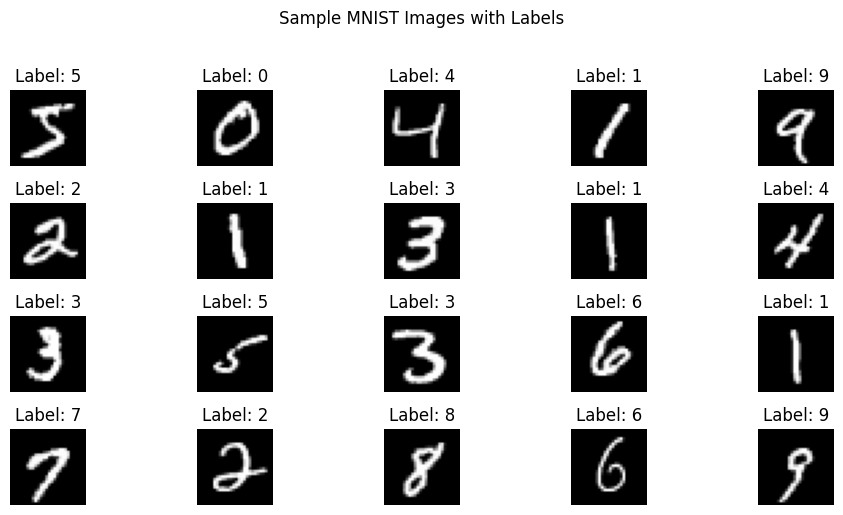

In [ ]:

plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images with Labels", y=1.02)
plt.tight_layout()
plt.show()

**Section:** Code Block: plt.figure(figsize=(8, 4))

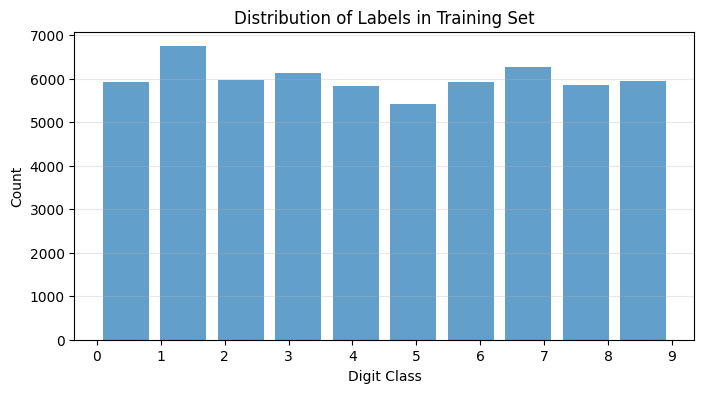

In [ ]:

plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()

**Section:** Code Block: model = keras.Sequential([

In [ ]:

model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    layers.GaussianNoise(0.1),

    keras.layers.Dense(2048, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),

    keras.layers.Dense(10, activation='softmax')
])

**Section:** Code Block: optimizer = keras.optimizers.AdamW(learning_rate=0.001)

In [ ]:

optimizer = keras.optimizers.AdamW(learning_rate=0.001)

model.compile(
    optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

**Section:** Code Block: early_stop = EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True)

In [ ]:

early_stop = EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.5,
    patience=10,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=300,
    batch_size=128,
    validation_data=(train_images, train_labels),
    callbacks=[early_stop, lr_schedule],
)

Epoch 1/300
456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4077 - sparse_categorical_accuracy: 0.8843

2025-06-05 17:02:40.226019: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3361', 24 bytes spill stores, 24 bytes spill loads



469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4035 - sparse_categorical_accuracy: 0.8856

2025-06-05 17:02:45.098367: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 4 bytes spill stores, 4 bytes spill loads

2025-06-05 17:02:45.282709: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 468 bytes spill stores, 468 bytes spill loads

2025-06-05 17:02:45.496827: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 64 bytes spill stores, 64 bytes spill loads

2025-06-05 17:02:45.570324: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 3072 bytes spill stores, 3056 bytes spill loads

2025-06-05 17:02:45.607924: I external/l

469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - loss: 0.4032 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.1638 - val_sparse_categorical_accuracy: 0.9625 - learning_rate: 0.0010
Epoch 2/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1601 - sparse_categorical_accuracy: 0.9632 - val_loss: 0.1136 - val_sparse_categorical_accuracy: 0.9780 - learning_rate: 0.0010
Epoch 3/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1380 - sparse_categorical_accuracy: 0.9723 - val_loss: 0.1039 - val_sparse_categorical_accuracy: 0.9819 - learning_rate: 0.0010
Epoch 4/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1217 - sparse_categorical_accuracy: 0.9780 - val_loss: 0.0919 - val_sparse_categorical_accuracy: 0.9879 - learning_rate: 0.0010
Epoch 5/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0909 - val_sparse_categorical_accuracy: 0.9885 - learning_rate: 0.0010
Epoch 6/300
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - 

**Section:** Code Block: test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

2025-06-05 17:15:33.816450: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 204 bytes spill stores, 204 bytes spill loads

2025-06-05 17:15:34.010491: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111_0', 396 bytes spill stores, 2300 bytes spill loads

2025-06-05 17:15:34.413430: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 3960 bytes spill stores, 3940 bytes spill loads

2025-06-05 17:15:34.453042: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_134_0', 412 bytes spill stores, 1028 bytes spill loads

2025-06-05 17:15:34.677043: 

282/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9875

2025-06-05 17:15:37.612116: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 116 bytes spill stores, 116 bytes spill loads

2025-06-05 17:15:37.878079: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_111', 3960 bytes spill stores, 3940 bytes spill loads

2025-06-05 17:15:37.966182: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_134', 60 bytes spill stores, 128 bytes spill loads

2025-06-05 17:15:38.020037: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_134', 4 bytes spill stores, 4 bytes spill loads

2025-06-05 17:15:38.082350: I external/

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0825 - sparse_categorical_accuracy: 0.9877

Test accuracy: 0.9898


**Note:** Test accuracy: 0.9898

**Section:** Code Block: # Plot training history

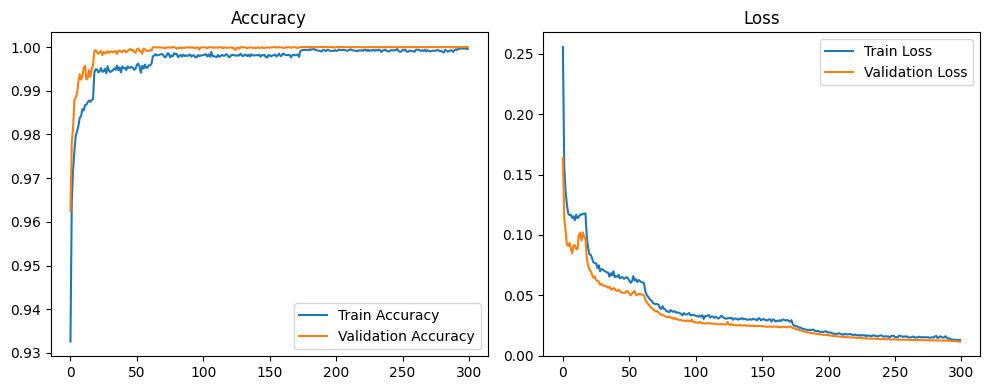

In [ ]:

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["sparse_categorical_accuracy"], label="Train Accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Section:** Code Block: # Make predictions and visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


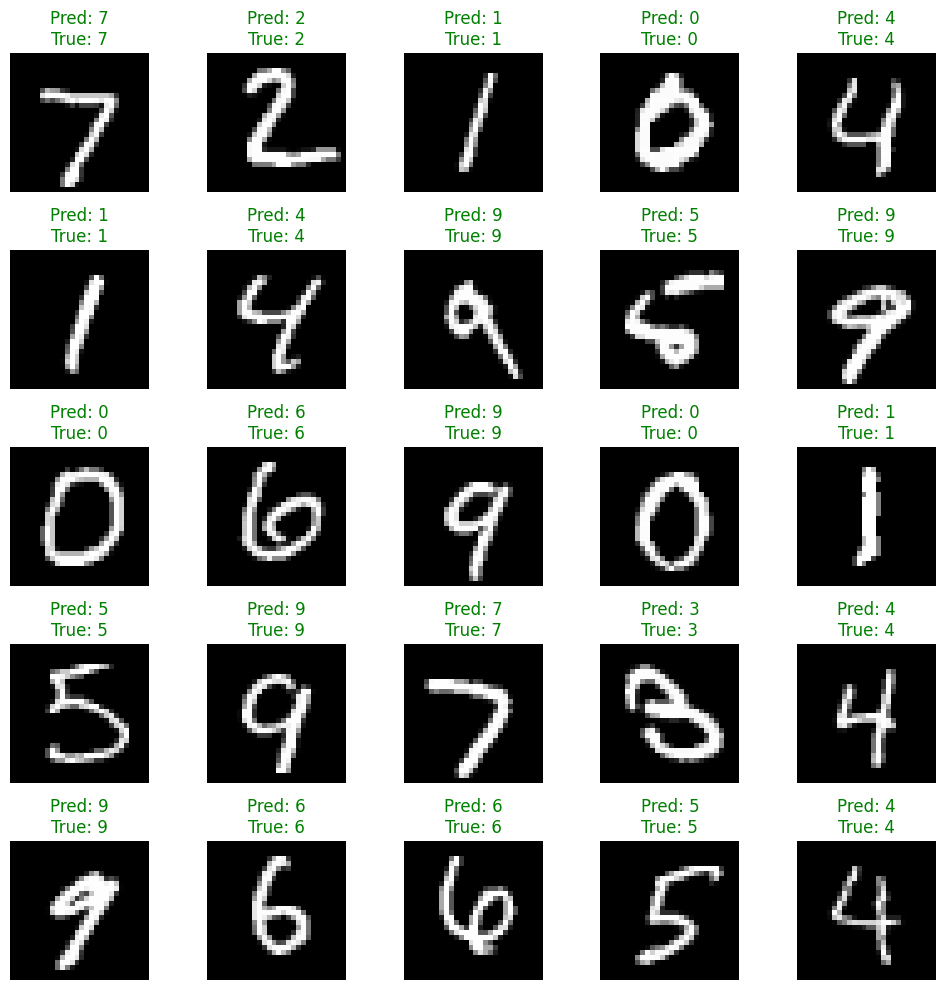

In [ ]:

# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()

**Section:** Code Block: model.summary()